In [1]:
using DSP
using SAC
using PyPlot
using SeisIO

In [2]:
bb = SAC.read("BBRockFall.sac");
geo = SAC.read("GeoRockFall.sac");

INFO: Data are little-endian; byteswapping
INFO: Data are little-endian; byteswapping


### Distancia RESCO-RF: 491.99m
### Dist. MRG-RF: 270.57m

In [3]:
bb.t = bb.t*(410.744e-12);
geo.t = geo.t*(3.125e-8);

In [4]:
ti = (DateTime(2017,11,6,16,41,0):(Dates.Millisecond(1))*10:DateTime(2017,11,6,16,42,30));
#t2 = (DateTime(2017,11,6,16,41,25):(Dates.Millisecond(1))*10:DateTime(2017,11,6,16,41,58));

In [5]:
ds1 = 1/(geo.delta*geo.npts);
ds2 = 1/(bb.delta*bb.npts);

In [6]:
fg = collect(0:geo.npts-1)*ds1;
n1 = convert(Int32,floor(geo.npts/2)+1);

In [7]:
fb = collect(0:bb.npts-1)*ds2;
n2 = convert(Int32,floor(bb.npts/2)+1);

In [8]:
rmean!(geo);
rtrend!(geo);

In [9]:
rmean!(bb);
rtrend!(bb);

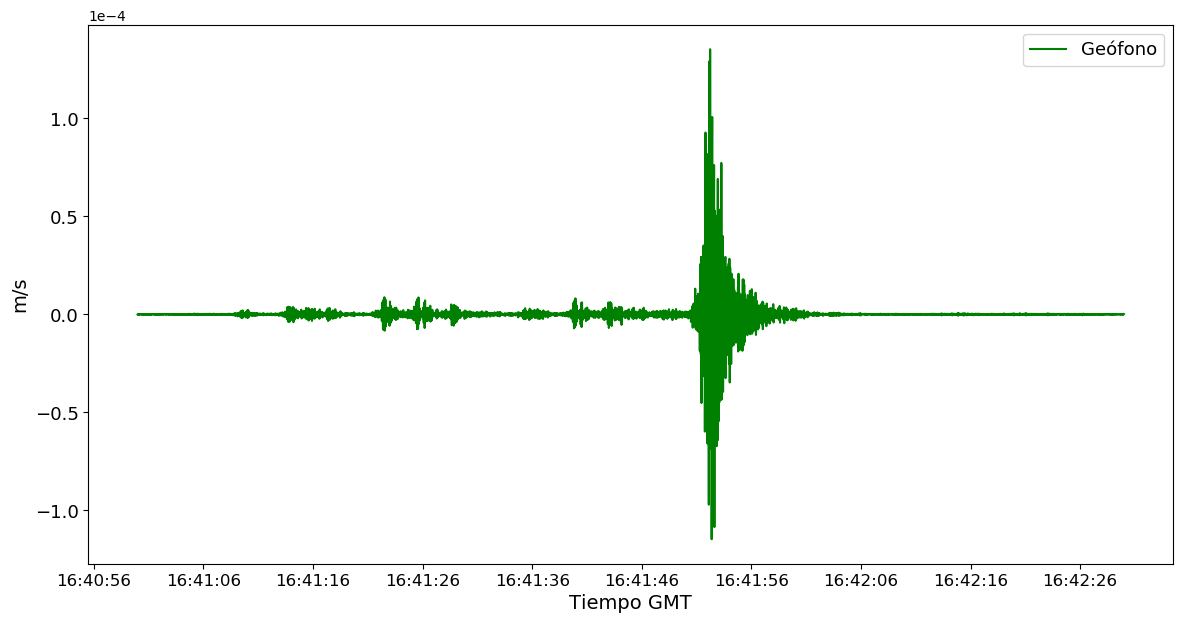

In [18]:
fig = figure(figsize=(14,7))
plot(ti,geo.t, label = "Geófono", "g")
#ax=gca()
#title("Rockfall geophone", fontsize=14)
xlabel("Tiempo GMT", fontsize=14)
xticks(fontsize=12)
#ax[:ticklabel_format](format="sci",axis="y",scilimits=(0,0))
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
ylabel("m/s", fontsize=14)
yticks(fontsize=13)
legend(loc="best",fontsize=13)
PyPlot.savefig("gt.png",dpi=400)

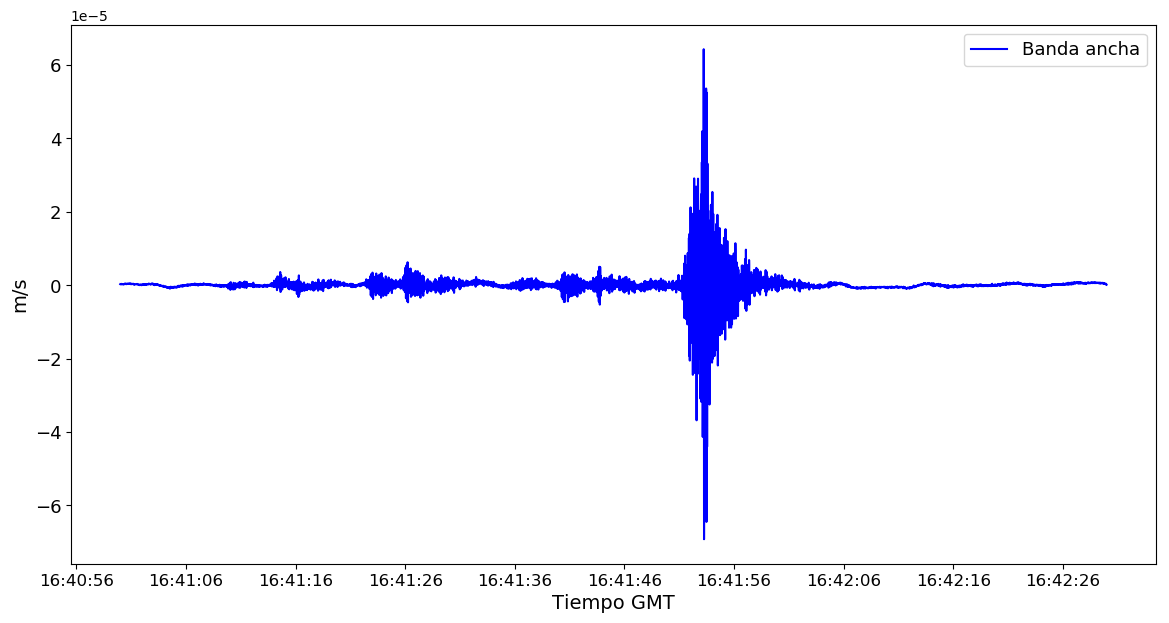

In [19]:
fig = figure(figsize=(14,7))
plot(ti,bb.t,label="Banda ancha","b")
#title("Rockfall Broad Band", fontsize=15)
xlabel("Tiempo GMT", fontsize=14)
xticks(fontsize=12)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
ylabel("m/s", fontsize=14)
yticks(fontsize=13)
legend(loc="best",fontsize=13)
PyPlot.savefig("bt.png",dpi=400)

In [27]:
#fig = figure(figsize=(13,6))
#plot(geo.t, "g")
#xlim(2500,5800)
#title("Rockfall geophone")
#xlabel("Tiempo")
#ylabel("Cuentas")

In [17]:
#env = abs.(hilbert(geo.t));

In [18]:
#envb = abs.(hilbert(bb.t));

In [54]:
#fig = figure(figsize=(12,6))
#plot(t,env, label="Geófono","k")
#title("Envolvente")
#xlabel("Tiempo")
#ylabel("Amplitud?")
#legend(loc="best")

In [13]:
#fig = figure(figsize=(14,7))
#plot(ti,envb, label="BroadBand","c")
#title("Envolvente")
#xlabel("Tiempo")
#ylabel("Amplitud?")
#legend(loc="best")

## _fft_

In [22]:
fou = abs.(fft(geo.t,1));
foub = abs.(fft(bb.t,1));

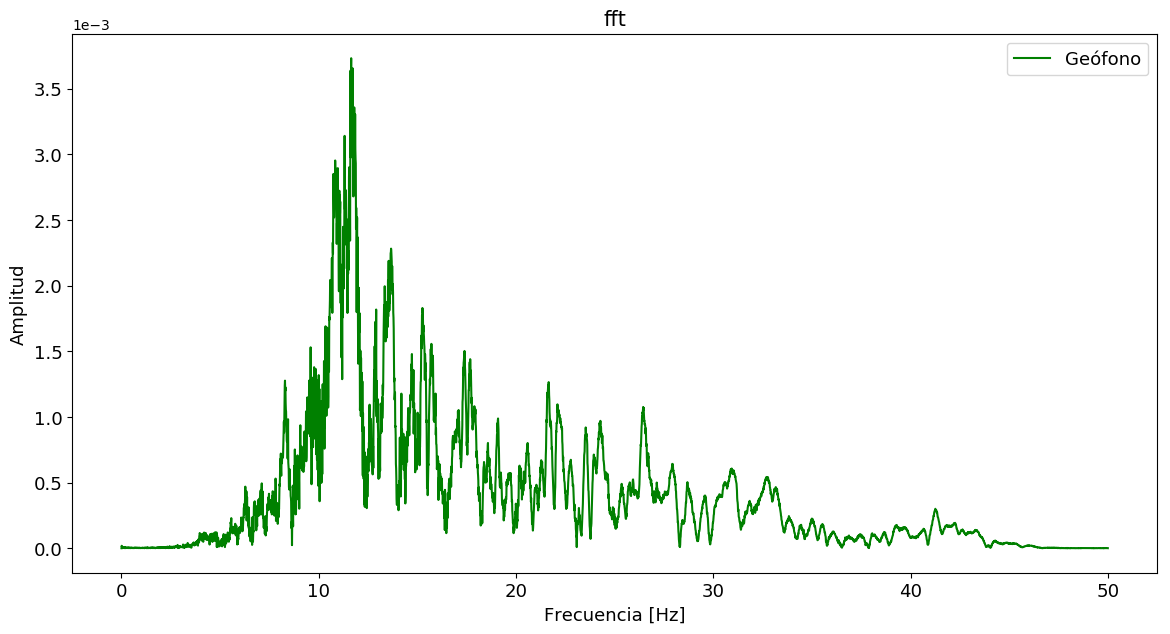

In [37]:
fig = figure(figsize=(14,7))
plot(fg[1:n1],fou[1:n1], label="Geófono","g")
title("fft", fontsize=15)
xlabel("Frecuencia [Hz]",fontsize=13)
xticks(fontsize=13)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
ylabel("Amplitud",fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
PyPlot.savefig("fft_g.png",dpi=400)

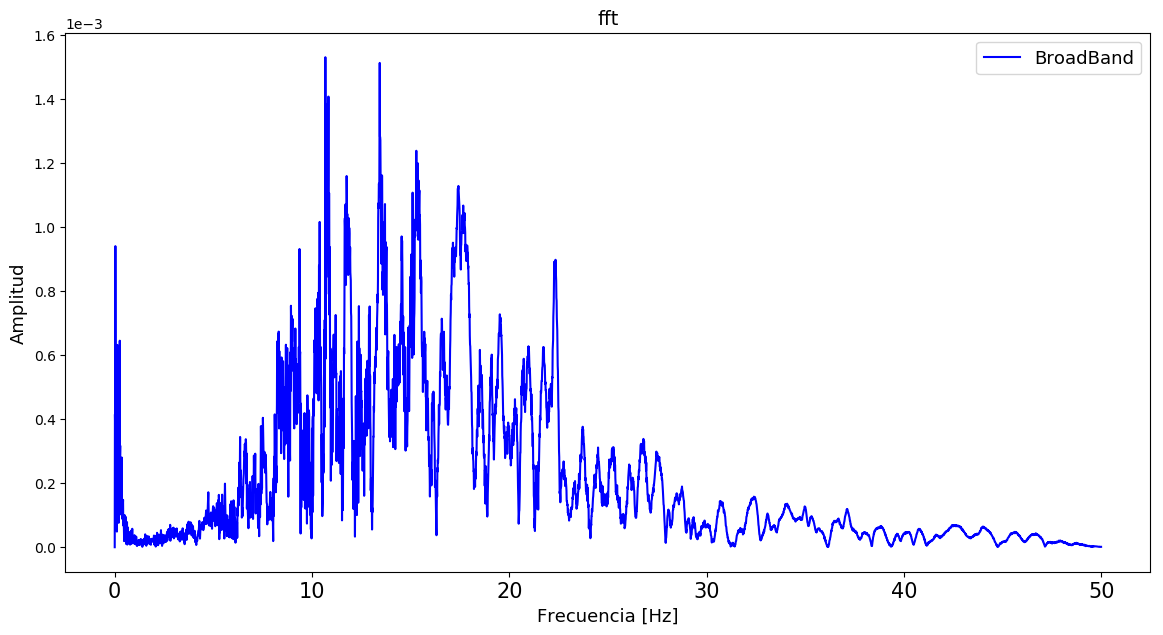

In [38]:
fig = figure(figsize=(14,7))
plot(fb[1:n1],foub[1:n1], label="BroadBand" ,"b")
title("fft", fontsize=14)
xlabel("Frecuencia [Hz]", fontsize=13)
xticks(fontsize=15)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
ylabel("Amplitud", fontsize=13)
legend(loc="best", fontsize=13)
PyPlot.savefig("fft_bb.png",dpi=400)

## Filtro Butterworth pasa-bandas BB: 1-49 Hz

In [26]:
bbr = Bandpass(1,49,fs=100)
desig = Butterworth(4)
fil = filt(digitalfilter(bbr,desig),bb.t);

## _Welch_

In [27]:
w = welch_pgram(geo.t,fs=100);

In [20]:
wb = welch_pgram(bb.t,fs=100);

In [28]:
wfil = welch_pgram(fil,fs=100);

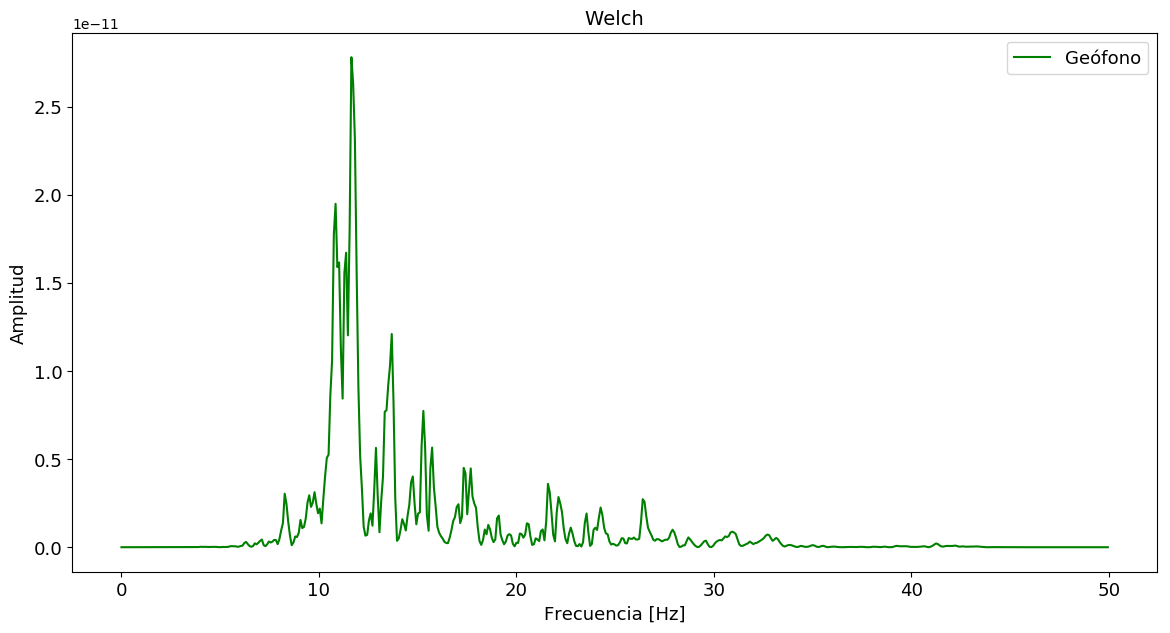

In [40]:
fig = figure(figsize=(14,7))
plot(w.freq,w.power, "g", label="Geófono")
title("Welch", fontsize=14)
xlabel("Frecuencia [Hz]", fontsize=13)
xticks(fontsize=13)
ylabel("Amplitud", fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
PyPlot.savefig("w_g.png", dpi=400)

In [20]:
#fig = figure(figsize=(14,7))
#plot(wb.freq,wb.power,label="Broad Band" ,"b")
#xlabel("Frecuencia [Hz]")
#ylabel("Amplitud")
#legend(loc="best")

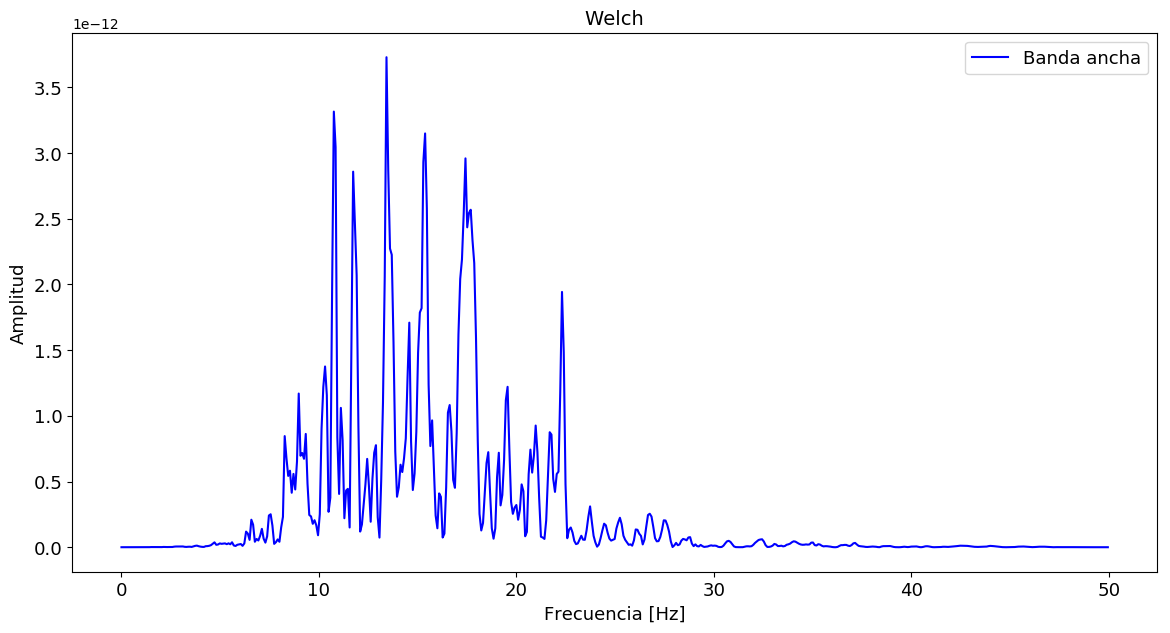

In [42]:
fig = figure(figsize=(14,7))
plot(wfil.freq,wfil.power,label="Banda ancha" ,"b")
title("Welch", fontsize=14)
xlabel("Frecuencia [Hz]", fontsize=13)
xticks(fontsize=13)
ylabel("Amplitud", fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
PyPlot.savefig("w_bf.png",dpi=400)

## _Multitaper_

In [31]:
mt = mt_pgram(geo.t,fs=100);

In [24]:
mtb = mt_pgram(bb.t,fs=100);

In [32]:
mtbf = mt_pgram(fil,fs=100);

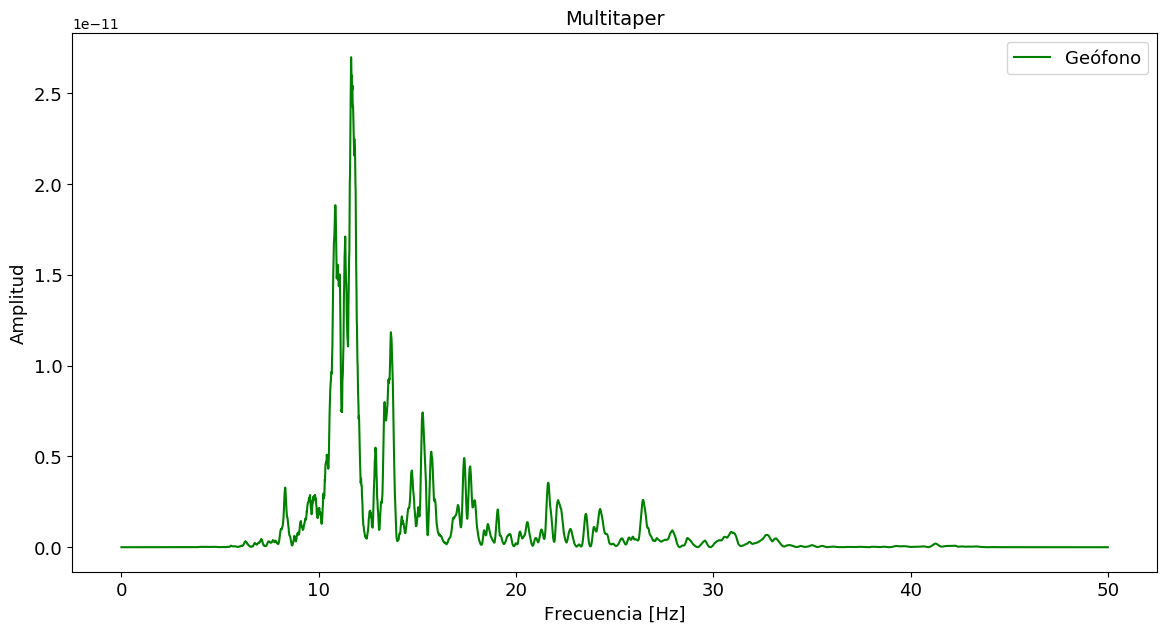

In [46]:
fig = figure(figsize=(14,7))
plot(mt.freq,mt.power,label="Geófono", "g")
title("Multitaper", fontsize=14)
xlabel("Frecuencia [Hz]",fontsize=13)
xticks(fontsize=13)
ylabel("Amplitud", fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
PyPlot.savefig("mt_g.png",dpi=400)

In [21]:
#fig = figure(figsize=(12,6))
#plot(mtb.freq,mtb.power,label="BroadBand","b")
#title("Multitaper")
#xlabel("Frecuencia [Hz]")
#ylabel("Amplitud")
#legend(loc="best")

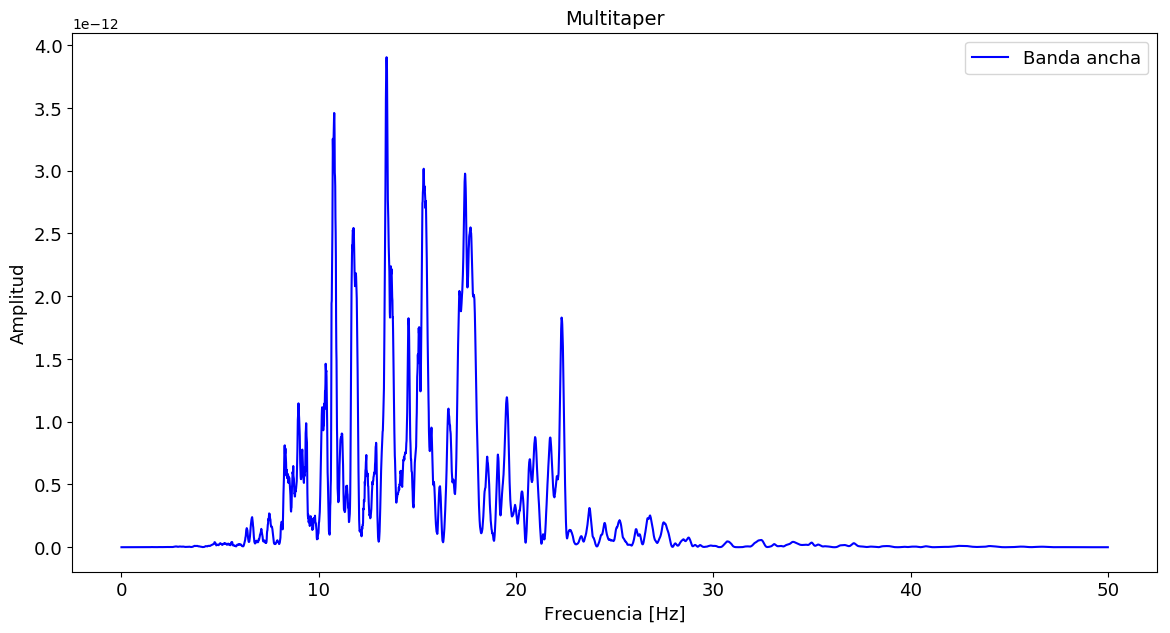

In [47]:
fig = figure(figsize=(14,7))
plot(mtbf.freq,mtbf.power,label="Banda ancha","b")
title("Multitaper", fontsize=14)
xlabel("Frecuencia [Hz]", fontsize=13)
xticks(fontsize=13)
ylabel("Amplitud", fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
PyPlot.savefig("mt_bf.png", dpi=400)

## los 3
### Śólo es para comparación, not necessary poner!!

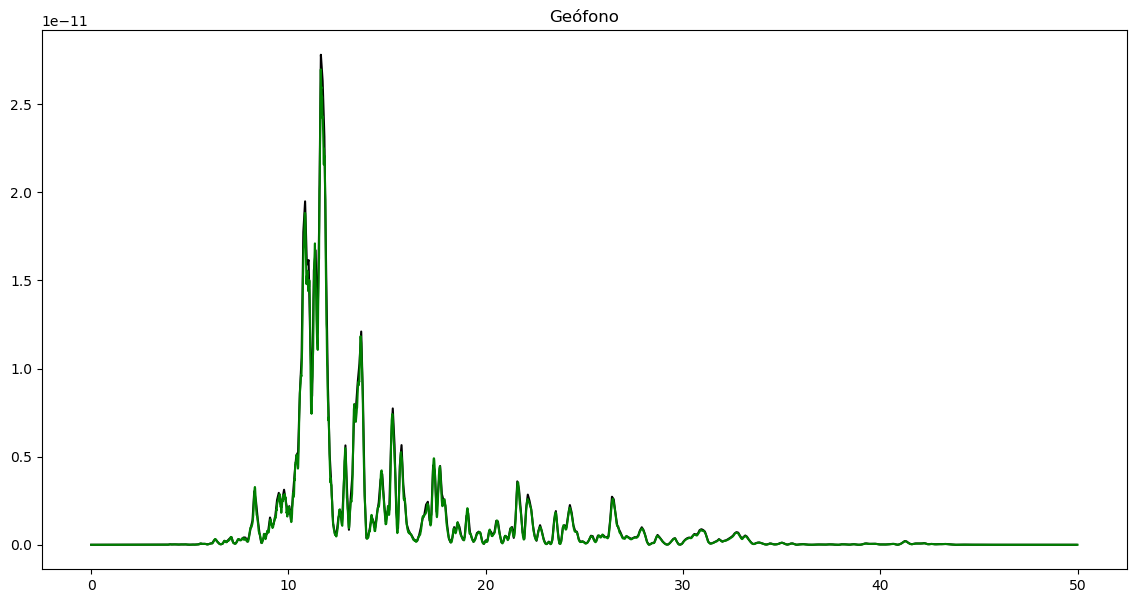

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6c68d03518>

In [45]:
fig = figure(figsize=(14,7))
title("Geófono")
plot(w.freq,w.power,"k")
plot(mt.freq,mt.power,"g")

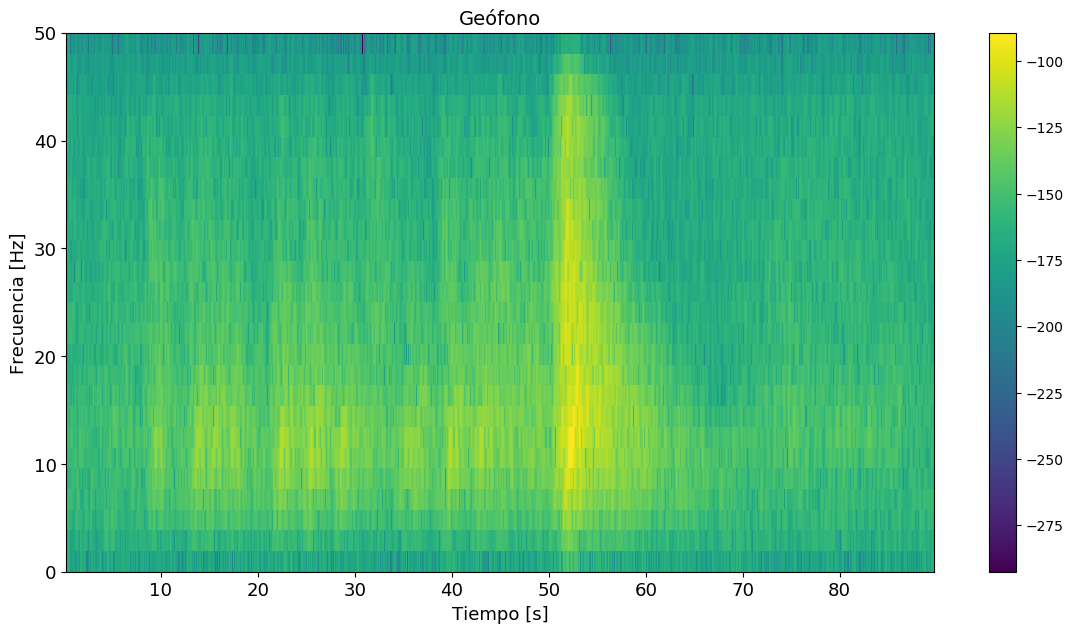

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff44d9323c8>

In [48]:
#Geófono
fig = figure(figsize=(14,7))
specgram(geo.t,50,100,pad_to=50,noverlap=49)
title("Geófono", fontsize=14)
xlabel("Tiempo [s]", fontsize=13)
xticks(fontsize=13)
ylabel("Frecuencia [Hz]", fontsize=13)
yticks(fontsize=13)
colorbar()

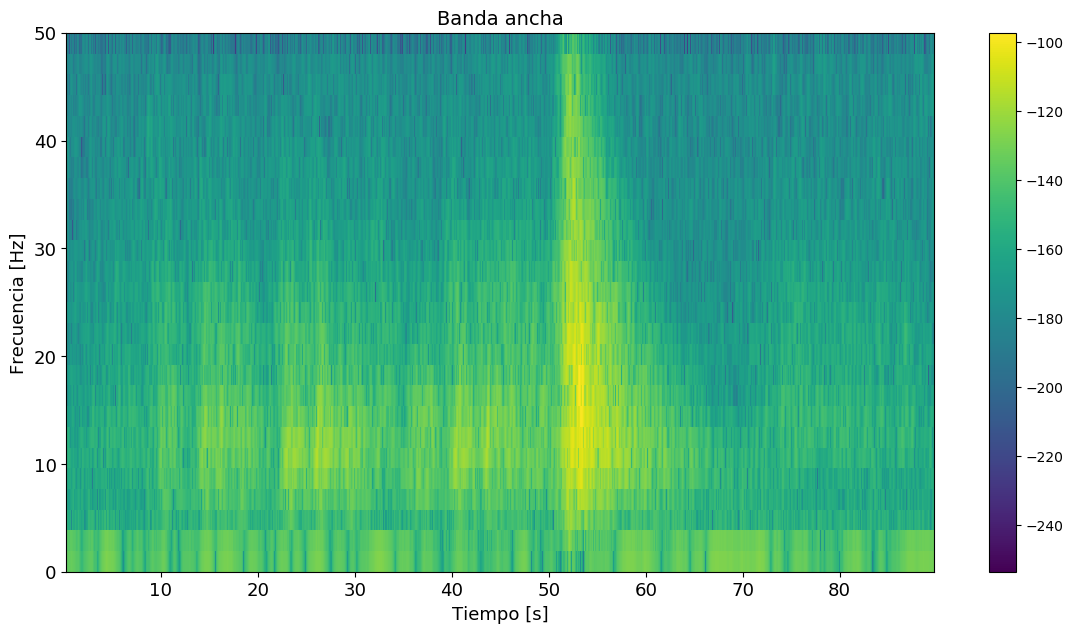

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff44b3915f8>

In [50]:
#Banda ancha
fig = figure(figsize=(14,7))
specgram(bb.t,50,100,pad_to=50,noverlap=49)
title("Banda ancha", fontsize=14)
xlabel("Tiempo [s]", fontsize=13)
xticks(fontsize=13)
ylabel("Frecuencia [Hz]", fontsize=13)
yticks(fontsize=13)
colorbar()

In [109]:
bb3 = readmseed("UC.MNGR.20171106.mseed");

In [108]:
bz = bb3[1];
be = bb3[2];
bn = bb3[3];

In [111]:
bz.x = bz.x*(410.744e-12);
be.x = be.x*(410.744e-12);
bn.x = bn.x*(410.744e-12);

In [98]:
#rmean!(bz);
#rmean!(be);
#rmean!(bn);

In [99]:
#rtrend!(bz);
#rtrend!(be);
#rtrend!(bn);

In [113]:
tz = collect(0:length(bz.x)-1)*(1/bz.fs);

In [114]:
te = collect(0:length(be.x)-1)*(1/be.fs);
tn = collect(0:length(bn.x)-1)*(1/bn.fs);

In [131]:
tt = tz[6006000:6015000];

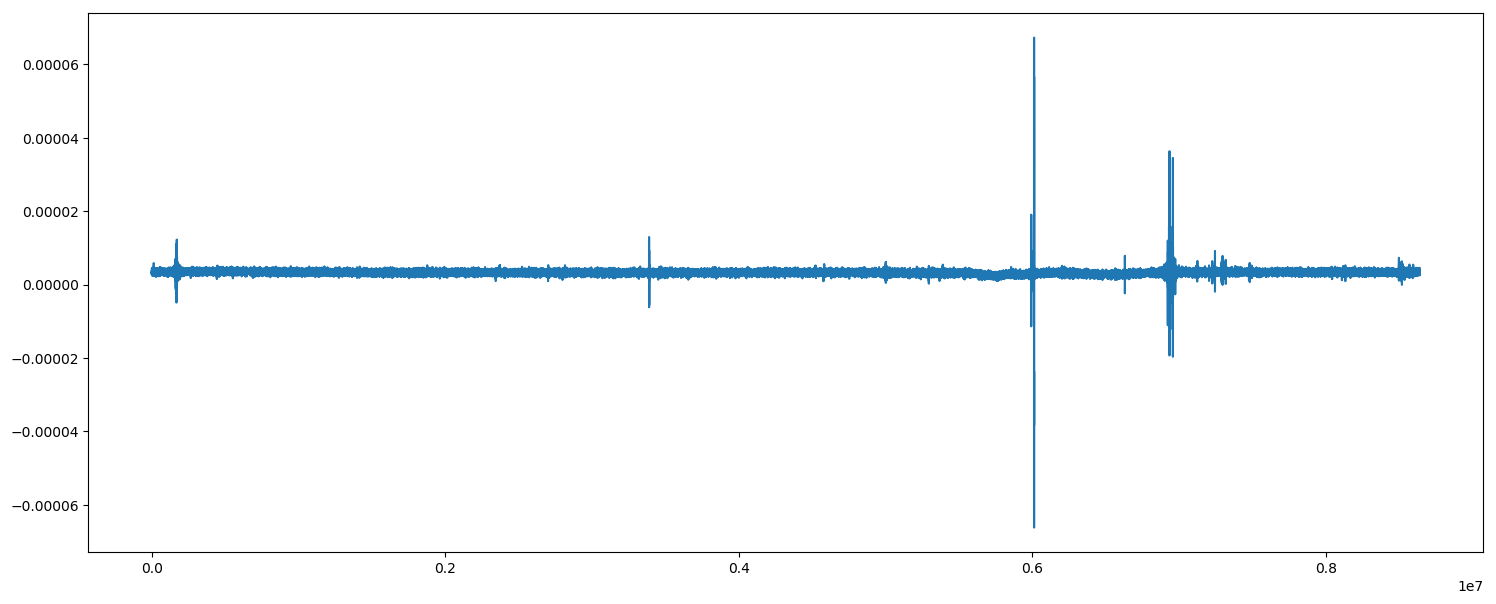

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f949502e390>

In [133]:
fig = figure(figsize=(18,7))
plot(bz.x)

In [118]:
8640001/100

86400.01

In [120]:
16*3600

57600

In [122]:
60060*100

6006000

In [123]:
57600+2460

60060

In [126]:
6006000+9000

6015000

In [21]:
491.99/270.57

1.818346453782755

In [22]:
270.58/270

1.002148148148148

In [48]:
workspace()